In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Input ve data augmentation
inputs = tf.keras.Input(shape=(224,224,3))
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)
])
x = data_augmentation(inputs)

# Convolutional Layers + Pooling
x = layers.Conv2D(32, (3,3), activation='relu')(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(128, (3,3), activation='relu', name="last_conv")(x)
x = layers.MaxPooling2D()(x)

# Fully Connected Layers
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)

# Modeli oluştur
cnn_model = models.Model(inputs, outputs)

# Model özeti
cnn_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

## 📌 Gerekli Kütüphanelerin Import Edilmesi

Bu çalışmada **derin öğrenme tabanlı görüntü sınıflandırma** için hem **TensorFlow/Keras**  framework’leri kullanılmıştır. Ayrıca veri işleme, görselleştirme ve performans değerlendirmesi için ek kütüphaneler de projeye dahil edilmiştir.  

### 🔹 Kullanılan Kütüphaneler
- `os`: Dosya ve dizin işlemleri için.
- `numpy`: Sayısal hesaplamalar ve matris işlemleri için.
- `pandas`: Veri çerçeveleri (DataFrame) ile veri yönetimi için.
- `matplotlib.pyplot` ve `seaborn`: Görselleştirme ve grafik çizimleri için.
- `tensorflow` ve `keras`: Derin öğrenme modelleri geliştirmek için.
- `sklearn.model_selection.train_test_split`: Veri kümesini eğitim/test olarak ayırmak için.
- `sklearn.metrics`: Sınıflandırma raporu ve karmaşıklık matrisi gibi metriklerin hesaplanması için.
- `ImageDataGenerator`: Veri artırma (data augmentation) işlemleri için.
- `warnings`: Gereksiz uyarı mesajlarını gizlemek için.

---

## ⚙️ GPU Kullanılabilirliğinin Kontrolü

Derin öğrenme modellerinin eğitimi yüksek hesaplama gücü gerektirdiğinden genelde GPU kullanılır. Burada GPU'nun  kullanılabilir olup olmadığının kontrol edilmiştir. 

```python
print("TensorFlow version:", tf.__version__)
print("PyTorch version:", torch.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


In [2]:
# Gerekli kütüphanelerin import edilmesi
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

# GPU kullanılabilirliğinin kontrolü
print("TensorFlow version:", tf.__version__)
print("PyTorch version:", torch.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

2025-09-26 08:08:13.900131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758874094.106071      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758874094.162481      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.18.0
PyTorch version: 2.6.0+cu124
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 📂 Veri Setinin Yüklenmesi ve İncelenmesi

Bu projede kullanılan veri seti **Brain Tumor MRI Dataset** olup Kaggle üzerinden elde edilmiştir. Veri seti iki ana klasörden oluşmaktadır:  

- **Training (Eğitim Seti):** Modelin öğrenmesi için kullanılan görüntüler.  
- **Testing (Test Seti):** Modelin doğruluğunu ölçmek için ayrılmış görüntüler.  

### 🔹 Veri Yollarının Tanımlanması
```python
train_dir = "/kaggle/input/brain-tumor-mri-dataset/Training"
test_dir  = "/kaggle/input/brain-tumor-mri-dataset/Testing"


Sınıflar: ['glioma', 'meningioma', 'notumor', 'pituitary']
Eğitim dağılımı: {'pituitary': 1457, 'notumor': 1595, 'meningioma': 1339, 'glioma': 1321}
Test dağılımı: {'pituitary': 300, 'notumor': 405, 'meningioma': 306, 'glioma': 300}


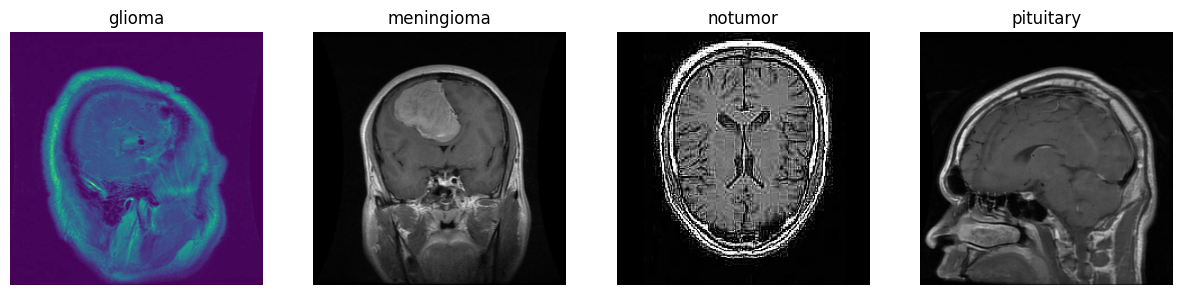

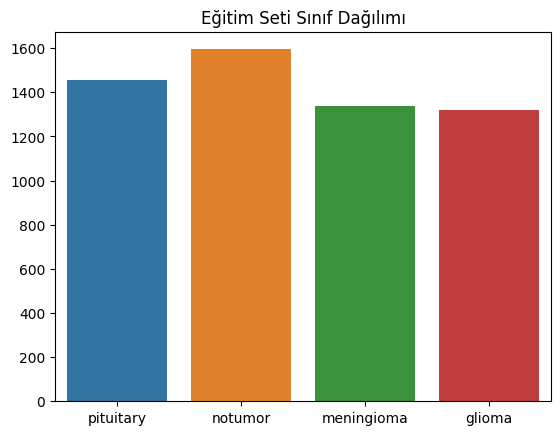

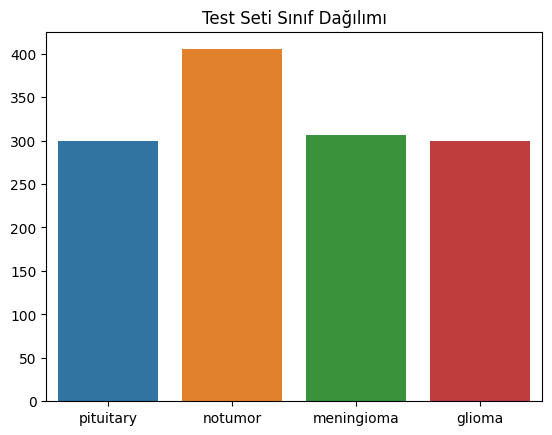

In [5]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# Veri yolları
train_dir = "/kaggle/input/brain-tumor-mri-dataset/Training"
test_dir  = "/kaggle/input/brain-tumor-mri-dataset/Testing"

# Sınıf isimleri
class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)
print("Sınıflar:", class_names)

# Veri dağılımını sayma
def count_images(data_dir):
    counts = {}
    for cls in os.listdir(data_dir):
        cls_path = os.path.join(data_dir, cls)
        counts[cls] = len(glob.glob(os.path.join(cls_path, "*")))
    return counts

train_counts = count_images(train_dir)
test_counts  = count_images(test_dir)
print("Eğitim dağılımı:", train_counts)
print("Test dağılımı:", test_counts)

# Örnek görüntüler
fig, axes = plt.subplots(1, num_classes, figsize=(15,5))
for i, cls in enumerate(class_names):
    img_path = glob.glob(os.path.join(train_dir, cls, "*"))[0]
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(cls)
    axes[i].axis("off")
plt.show()

# Bar plot
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Eğitim Seti Sınıf Dağılımı")
plt.show()
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()))
plt.title("Test Seti Sınıf Dağılımı")
plt.show()


## 🛠️ Veri Ön İşleme (Preprocessing)

Derin öğrenme modellerinin doğru çalışabilmesi için görüntülerin **yüklenmesi, boyutlandırılması, normalize edilmesi** ve **etiketlerin uygun formata dönüştürülmesi** gerekir. Bu adımda, veri seti modele uygun hale getirilmiştir.  

---

### 🔹 Görüntülerin Yüklenmesi ve Boyutlandırılması
```python
def load_data(data_dir, class_names, target_size=(224,224)):
    images, labels = [], []
    for idx, cls in enumerate(class_names):
        files = glob.glob(os.path.join(data_dir, cls, "*"))
        for f in files:
            img = Image.open(f).convert("RGB").resize(target_size)
            images.append(np.array(img))
            labels.append(idx)
    return np.array(images), np.array(labels)


## 🔎 Veri Ön İşleme Adımları

Derin öğrenme tabanlı sınıflandırma modelleri için görüntülerin modele uygun hale getirilmesi kritik bir aşamadır. Bu bölümde veri seti, sırasıyla **yükleme, yeniden boyutlandırma, normalizasyon, etiket dönüştürme (one-hot encoding) ve eğitim/doğrulama ayrımı** işlemlerinden geçirilmiştir.  

---

### 1️⃣ Görüntülerin Yüklenmesi ve Yeniden Boyutlandırılması
- Tüm MRI görüntüleri diskten okunmuş ve belleğe aktarılmıştır.  
- `PIL.Image` kullanılarak her görüntü:  
  - **RGB formatına** dönüştürülmüştür (gri ölçekli görüntüler de renkli hale getirilir).  
  - **224x224 piksel** boyutuna ölçeklenmiştir (CNN tabanlı modeller sabit giriş boyutu gerektirir).  
- Her sınıfa karşılık gelen etiketler sayısal değerler (`0,1,2,...`) olarak atanmıştır.  

---

### 2️⃣ Normalizasyon (0–1 Aralığına Getirme)
- Görüntülerin piksel değerleri başlangıçta **0–255** aralığındadır.  
- `x.astype("float32") / 255.0` ifadesi ile değerler **0–1 aralığına ölçeklenmiştir**.  
- Bu işlem:
  - Eğitim sırasında **sayısal stabilite** sağlar.  
  - Optimizasyon algoritmalarının daha hızlı ve dengeli çalışmasına yardımcı olur.  

---

### 3️⃣ One-Hot Encoding (Etiketlerin Dönüştürülmesi)
- Sınıf etiketleri (`0, 1, 2, ...`) **one-hot vektörleri** haline getirilmiştir.  
- Bu dönüşüm sayesinde modelin **Softmax çıkış katmanı** ile uyum sağlanır.  
- Örneğin:  
  - `0 → [1, 0, 0, 0]`  
  - `2 → [0, 0, 1, 0]`  

---

### 4️⃣ Eğitim / Doğrulama Ayrımı
- Eğitim seti içerisinden %20 oranında veri ayrılarak **doğrulama (validation) seti** oluşturulmuştur.  
- `stratify=y_train` parametresi ile sınıf dağılımları korunmuştur.  
- `random_state=42` kullanılarak **tekrarlanabilirlik** sağlanmıştır.  

---

### 5️⃣ Boyutların Kontrolü
- Eğitim, doğrulama ve test kümelerinin boyutları ekrana yazdırılmıştır.  
- Örneğin:  
  - Eğitim seti: `(n_samples, 224, 224, 3)`  
  - Doğrulama seti: `(n_samples, 224, 224, 3)`  
  - Test seti: `(n_samples, 224, 224, 3)`  

---

✅ Bu adımlar tamamlandıktan sonra veri seti, derin öğrenme modellerinin eğitimine hazır hale getirilmiştir.  


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Görüntüleri yükleme ve boyutlandırma
def load_data(data_dir, class_names, target_size=(224,224)):
    images, labels = [], []
    for idx, cls in enumerate(class_names):
        files = glob.glob(os.path.join(data_dir, cls, "*"))
        for f in files:
            img = Image.open(f).convert("RGB").resize(target_size)
            images.append(np.array(img))
            labels.append(idx)
    return np.array(images), np.array(labels)

x_train, y_train = load_data(train_dir, class_names)
x_test, y_test   = load_data(test_dir, class_names)

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# One-hot encode
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh  = to_categorical(y_test, num_classes)

# Train/Validation split
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train_oh, test_size=0.2, stratify=y_train, random_state=42
)

print("Eğitim şekli:", x_train_split.shape)
print("Val şekli:", x_val.shape)
print("Test şekli:", x_test.shape)


Eğitim şekli: (4569, 224, 224, 3)
Val şekli: (1143, 224, 224, 3)
Test şekli: (1311, 224, 224, 3)


## Veri Artırma (Data Augmentation)

Modelin genelleme kabiliyetini artırmak ve aşırı öğrenmeyi (overfitting) önlemek için **veri artırma teknikleri** uygulanmıştır. Bu sayede model, daha çeşitli veri görerek farklı varyasyonlara karşı daha dayanıklı hale gelir.

Aşağıdaki kod bloğunda TensorFlow `layers` modülü ile tanımlanan veri artırma işlemleri gösterilmektedir:

```python
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1)
])




### Kullanılan Teknikler

- RandomFlip("horizontal")

Görüntüler rastgele yatay eksende çevrilir.

MRI görüntülerinde simetriye bağlı varyasyonların öğretilmesine yardımcı olur.

- RandomRotation(0.1)

Görüntüler, ±%10 oranında rastgele döndürülür.

Modelin farklı açılardaki görüntülere karşı daha sağlam olmasını sağlar.

- RandomZoom(0.1)

Görüntüler rastgele yakınlaştırılır veya uzaklaştırılır (±%10).

Ölçek değişimlerine karşı modelin dayanıklılığını artırır.

- RandomTranslation(0.1, 0.1)

Görüntüler yatay ve dikey eksende rastgele kaydırılır.

Görüntüdeki nesnelerin konum farklılıklarına karşı esneklik sağlar.

In [8]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1)
])


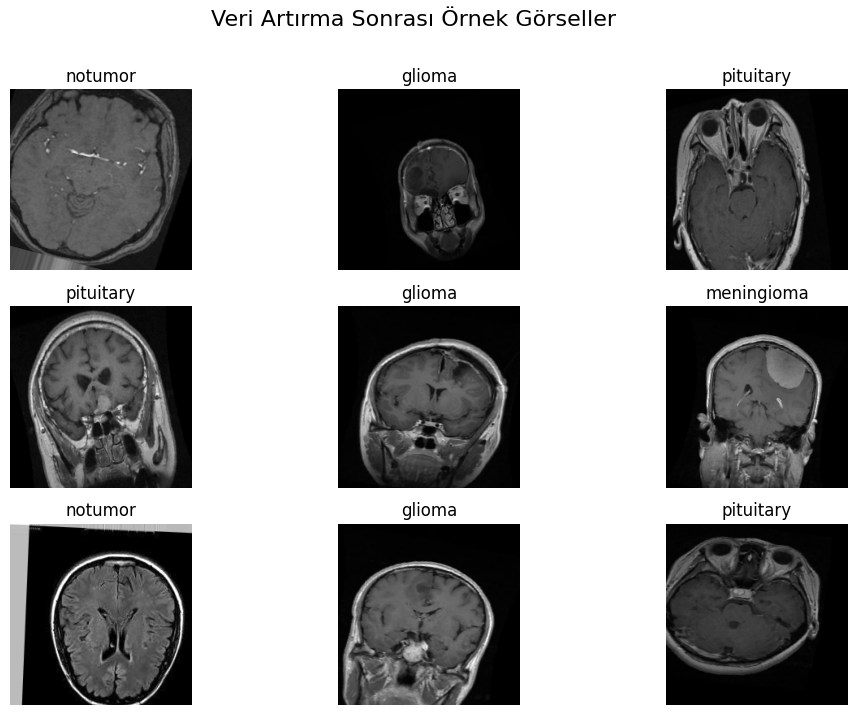

In [12]:
import matplotlib.pyplot as plt

# Bir batch (32 görüntü) alalım
images, labels = next(train_generator)

plt.figure(figsize=(12, 8))
for i in range(9):  # ilk 9 görüntüyü gösterelim
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])  # sınıf ismini yaz
    plt.axis("off")
plt.suptitle("Veri Artırma Sonrası Örnek Görseller", fontsize=16)
plt.show()


##  CNN Modeli Oluşturma

Bu bölümde **basit bir Convolutional Neural Network (CNN)** modeli tanımlanmıştır. Model, veri artırma katmanı ile girişten başlar ve birkaç **Conv2D + MaxPooling2D** katmanı ile derinleştirilir. Sonrasında tam bağlantılı (dense) katmanlarla sınıflandırma yapılır.

---

### 🔹 Kod
```python
inputs = tf.keras.Input(shape=(224,224,3))

# Veri artırma katmanı
x = data_augmentation(inputs)

# Konvolüsyon ve havuzlama katmanları
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(128, 3, activation='relu', name="last_conv")(x)
x = layers.MaxPooling2D()(x)

# Flatten ve Dense katmanları
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Çıkış katmanı
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Modeli oluştur
cnn_model = tf.keras.Model(inputs, outputs)
cnn_model.summary()


## Katman Açıklamaları

- Input Layer (Input)

Model 224x224 boyutunda ve 3 kanallı (RGB) görüntüleri alır.

- Data Augmentation (data_augmentation)

Eğitim sırasında görüntüleri rastgele çevirme, döndürme, yakınlaştırma ve kaydırma ile çeşitlendirir.

- Conv2D + MaxPooling2D Katmanları

Conv2D(32,3) → 32 filtre, 3x3 boyutunda çekirdek, ReLU aktivasyonu.

- MaxPooling2D → Özellik haritasını boyutlandırır ve özetler.

Toplam 3 konvolüsyon bloğu kullanılmıştır; son blok "last_conv" olarak isimlendirilmiştir.

- Flatten Katmanı

Konvolüsyon çıktısını tek boyutlu vektöre dönüştürür.

- Dense Katmanı

128 nöronlu ReLU aktivasyonlu katman ile soyut özellikler öğrenilir.

- Dropout(0.5) → Overfitting riskini azaltmak için rastgele nöronları kapatır.

- Output Layer (Dense)

num_classes çıkışı olan softmax katmanı.

Çok sınıflı sınıflandırma için olasılık değerleri üretir.

In [9]:
inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, 3, activation='relu', name="last_conv")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

cnn_model = tf.keras.Model(inputs, outputs)
cnn_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

##  Modelin Derlenmesi ve Eğitimi

Bu bölümde, CNN modeli **derlenmiş**, gerekli **callback’ler** eklenmiş ve eğitim süreci başlatılmıştır.  

---

### 🔹 Kod
```python
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

# Epoch log callback
class EpochLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f"Epoch {epoch+1}: loss={logs.get('loss'):.4f}, val_loss={logs.get('val_loss'):.4f}, acc={logs.get('accuracy'):.4f}, val_acc={logs.get('val_accuracy'):.4f}")

# EarlyStopping ve Checkpoint
early_stopping = EarlyStopping(
    monitor='val_loss',      # Doğrulama kaybını izler
    patience=10,             # 10 epoch boyunca iyileşme yoksa durur
    restore_best_weights=True, 
    verbose=1
)

checkpoint = ModelCheckpoint(
    "best_cnn_model.h5",    # En iyi modeli kaydeder
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

# Model derleme
cnn_model.compile(
    optimizer='adam',                # Optimizasyon algoritması
    loss='categorical_crossentropy',# Çok sınıflı sınıflandırma kaybı
    metrics=['accuracy']             # İzlenecek metrik
)

# Modeli eğit
history = cnn_model.fit(
    x_train_split, y_train_split,          # Eğitim verileri
    validation_data=(x_val, y_val),       # Doğrulama verileri
    epochs=100,                            # Maksimum epoch sayısı
    batch_size=32,                         # Batch boyutu
    callbacks=[early_stopping, checkpoint, EpochLogger()],
    verbose=0                               # Epoch başına loglar, EpochLogger ile yazdırılır
)


- EpochLogger

Her epoch sonunda eğitim ve doğrulama kaybı (loss, val_loss) ve doğruluk (accuracy, val_accuracy) yazdırılır.

- EarlyStopping

Doğrulama kaybı iyileşmezse eğitim erken durdurulur.

restore_best_weights=True → En iyi ağırlıklar geri yüklenir.

- ModelCheckpoint

Modelin en iyi doğrulama kaybına sahip hali best_cnn_model.h5 olarak kaydedilir.

- Model Compile

optimizer='adam' → Adaptif optimizasyon algoritması.

loss='categorical_crossentropy' → Çok sınıflı sınıflandırma kaybı.

metrics=['accuracy'] → Eğitim sırasında doğruluk metriği izlenir.

- Model Fit

Eğitim verileri ve doğrulama verileri kullanılarak model eğitilir.

callbacks ile erken durdurma, model kaydetme ve loglama yapılır.

verbose=0 ile standart Keras logları kapatılır, yerine EpochLogger çıktısı gösterilir.

**Bu yapı sayesinde eğitim süreci hem kontrollü hem de takip edilebilir olur.
Model, doğrulama kaybı en düşük seviyedeyken kaydedilir ve fazla eğitimden kaynaklı aşırı uyum (overfitting) önlenir.**

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

# Epoch log callback
class EpochLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f"Epoch {epoch+1}: loss={logs.get('loss'):.4f}, val_loss={logs.get('val_loss'):.4f}, acc={logs.get('accuracy'):.4f}, val_acc={logs.get('val_accuracy'):.4f}")

# EarlyStopping & Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("best_cnn_model.h5", monitor="val_loss", save_best_only=True, verbose=1)
# Compile
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit
history = cnn_model.fit(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, EpochLogger()],
    verbose=0
)



I0000 00:00:1758874299.088131     101 cuda_dnn.cc:529] Loaded cuDNN version 90300



Epoch 1: val_loss improved from inf to 0.81222, saving model to best_cnn_model.h5
Epoch 1: loss=0.9769, val_loss=0.8122, acc=0.5743, val_acc=0.6562

Epoch 2: val_loss improved from 0.81222 to 0.55229, saving model to best_cnn_model.h5
Epoch 2: loss=0.7581, val_loss=0.5523, acc=0.6960, val_acc=0.8031

Epoch 3: val_loss did not improve from 0.55229
Epoch 3: loss=0.6555, val_loss=0.9044, acc=0.7448, val_acc=0.6833

Epoch 4: val_loss improved from 0.55229 to 0.54767, saving model to best_cnn_model.h5
Epoch 4: loss=0.6149, val_loss=0.5477, acc=0.7667, val_acc=0.7778

Epoch 5: val_loss improved from 0.54767 to 0.41373, saving model to best_cnn_model.h5
Epoch 5: loss=0.5882, val_loss=0.4137, acc=0.7682, val_acc=0.8259

Epoch 6: val_loss improved from 0.41373 to 0.41140, saving model to best_cnn_model.h5
Epoch 6: loss=0.5693, val_loss=0.4114, acc=0.7855, val_acc=0.8416

Epoch 7: val_loss did not improve from 0.41140
Epoch 7: loss=0.5205, val_loss=0.5202, acc=0.8015, val_acc=0.8101

Epoch 8: v

## 📊 Model Performans Görselleştirmesi

Eğitim tamamlandıktan sonra modelin **başarımları görselleştirilir**. Bu, hem eğitim sürecini analiz etmek hem de test verisi üzerindeki performansı değerlendirmek için gereklidir.

---

**Accuracy Grafiği → Eğitim ve doğrulama doğrulukları karşılaştırılır.**

**Loss Grafiği → Eğitim ve doğrulama kayıpları gösterilir.**

**EarlyStop → Kırmızı kesik çizgi, erken durdurma noktasını belirtir.**

***Bu grafikler, modelin aşırı öğrenip öğrenmediğini ve erken durdurmanın etkisini görmemizi sağlar.***




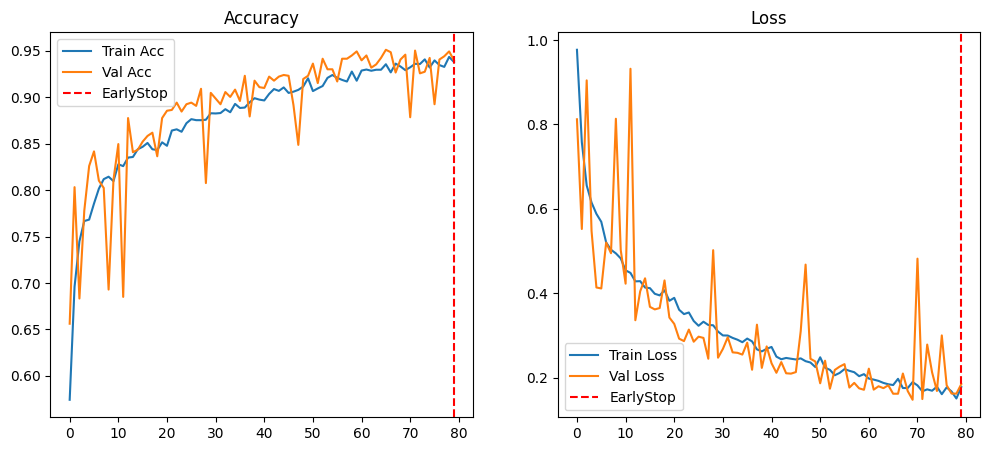

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


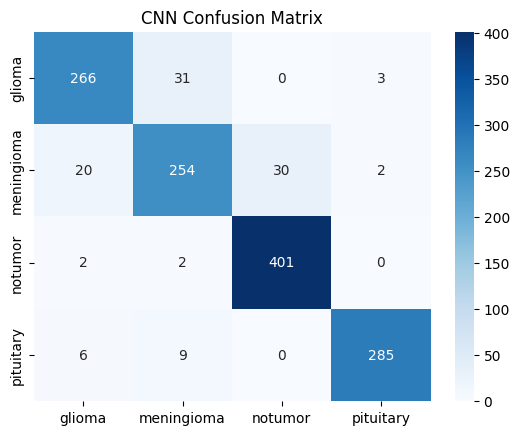

In [11]:
# Accuracy / Loss grafikleri
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.axvline(x=len(history.history['val_loss'])-1, color='red', linestyle='--', label='EarlyStop')
plt.title("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.axvline(x=len(history.history['val_loss'])-1, color='red', linestyle='--', label='EarlyStop')
plt.title("Loss"); plt.legend()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred_cnn = np.argmax(cnn_model.predict(x_test), axis=1)
y_true = np.argmax(y_test_oh, axis=1)
cm = confusion_matrix(y_true, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.title("CNN Confusion Matrix")
plt.show()


## 🔥 Grad-CAM ile Modelin İlgi Alanlarını Görselleştirme

Grad-CAM (Gradient-weighted Class Activation Mapping), CNN modelinin **hangi bölgeleri sınıflandırmada kullandığını görselleştirmemizi sağlar**.  
Bu, özellikle tıbbi görüntülerde modelin **odaklandığı alanları analiz etmek** için faydalıdır.

---

- make_gradcam_heatmap fonksiyonu

Modelin son konvolüsyon katmanına kadar olan çıktıları ve tahminleri alır.

Tahmin edilen sınıfa göre gradyan hesaplayarak heatmap üretir.

Heatmap, her pikselin sınıflandırma üzerindeki önemini gösterir.

- Heatmap Görselleştirme

cv2.applyColorMap → Heatmap’i renkli hale getirir.

cv2.addWeighted → Orijinal görüntü ile overlay yapar.

Böylece modelin hangi bölgeleri “odaklandığını” görselleştirebiliriz.

- Görsel çıktılar

Original → Orijinal MRI görüntüsü

Grad-CAM → Modelin dikkat ettiği bölgeler

Overlay → Heatmap’in orijinal görüntü ile birleştirilmiş hali

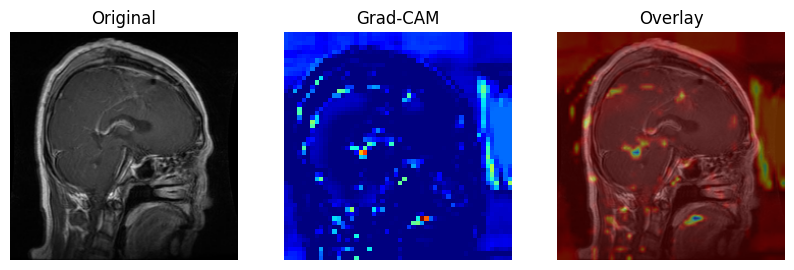

In [13]:
import cv2
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="last_conv"):
    grad_model = tf.keras.models.Model(inputs=model.inputs,
                                       outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap,0)/tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Test img
img_idx = 10
img = x_test[img_idx]
img_array = np.expand_dims(img, axis=0)
heatmap = make_gradcam_heatmap(img_array, cnn_model)

heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap_colored = cv2.applyColorMap(np.uint8(255*heatmap_resized), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(np.uint8(img*255), 0.6, heatmap_colored, 0.4, 0)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(heatmap, cmap="jet"); plt.title("Grad-CAM"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(overlay); plt.title("Overlay"); plt.axis("off")
plt.show()


## 🧪 Test Seti Üzerinde Model Değerlendirmesi

Modelin eğitimi tamamlandıktan sonra, test seti kullanılarak performansı ölçülür.  
Bu adım, modelin **genelleme kabiliyetini ve gerçek veri üzerindeki başarısını** değerlendirir.

---

* Test Loss & Accuracy

cnn_model.evaluate → Modelin test setindeki kaybı (loss) ve doğruluğu (accuracy) ölçer.

Test verisi, eğitim ve doğrulama setinden bağımsız olduğu için gerçek performans göstergesidir.

* Tahminler

cnn_model.predict → Test görüntüleri için olasılık tahminleri üretir.

np.argmax → En yüksek olasılığa sahip sınıf seçilir.


* Confusion Matrix

Modelin hangi sınıfları doğru veya yanlış tahmin ettiğini görselleştirir.

Satırlar → Gerçek sınıflar (y_true)

Sütunlar → Tahmin edilen sınıflar (y_pred_cnn)

Diyagonal → Doğru tahminler, Off-diagonal → Yanlış tahminler

***Confusion matrix sayesinde modelin hangi sınıflarda güçlü, hangi sınıflarda zayıf olduğunu görebiliriz.***

* Classification Report

precision, recall, f1-score ve support değerlerini verir.

Hangi sınıfta modelin güçlü veya zayıf olduğunu detaylı şekilde gösterir.

Test Loss: 0.1853
Test Accuracy: 0.9199
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


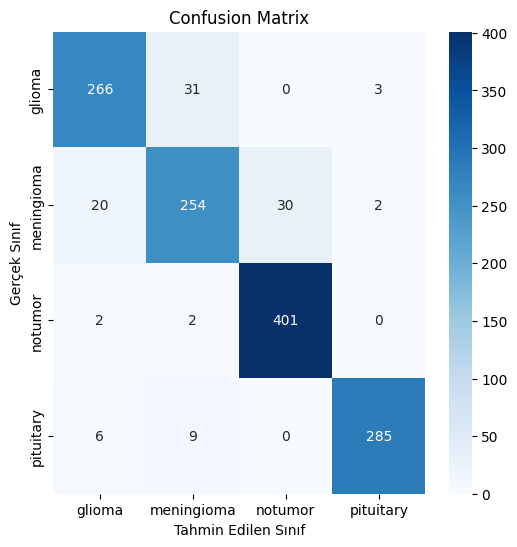

Classification Report:
              precision    recall  f1-score   support

      glioma       0.90      0.89      0.90       300
  meningioma       0.86      0.83      0.84       306
     notumor       0.93      0.99      0.96       405
   pituitary       0.98      0.95      0.97       300

    accuracy                           0.92      1311
   macro avg       0.92      0.91      0.92      1311
weighted avg       0.92      0.92      0.92      1311



In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Test setinde model performansı
test_loss, test_acc = cnn_model.evaluate(x_test, y_test_oh, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# 2️⃣ Tahminler
y_pred_probs = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_oh, axis=1)

# 3️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.ylabel("Gerçek Sınıf")
plt.xlabel("Tahmin Edilen Sınıf")
plt.show()

# 4️⃣ Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


In [15]:
# Epoch log callback
class EpochLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f"Epoch {epoch+1}: loss={logs.get('loss'):.4f}, val_loss={logs.get('val_loss'):.4f}, acc={logs.get('accuracy'):.4f}, val_acc={logs.get('val_accuracy'):.4f}")

# EarlyStopping & Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("best_cnn_model.h5", monitor="val_loss", save_best_only=True, verbose=1)

## 🔄 Transfer Learning ile ResNet50 Kullanımı

Transfer Learning, önceden eğitilmiş bir modeli alıp kendi veri setimize uyarlamak anlamına gelir.  
Bu yöntem, özellikle **veri miktarı sınırlı olduğunda** modelin hızlı ve etkili öğrenmesini sağlar.

---

* ResNet50 Base Model

ImageNet üzerinde önceden eğitilmiş ve güçlü özellik çıkarıcı bir model.

include_top=False ile son sınıflandırma katmanı çıkarılır, kendi sınıflandırma katmanımız eklenir.

trainable=False ile ağırlıklar sabitlenir, böylece önceden öğrenilen özellikler korunur.

* GlobalAveragePooling2D

Konvolüsyon katmanından çıkan özellik haritalarını tek boyutlu vektöre indirger.

Parametre sayısını azaltır ve overfitting riskini düşürür.

* Dense + Dropout Katmanları

128 nöronlu dense katman ile yeni özellikler öğrenilir.

Dropout(0.5) → Rastgele nöronlar kapatılarak overfitting önlenir.

* Output Layer

num_classes çıkışı olan softmax katmanı, çok sınıflı sınıflandırma sağlar.

* Model Fit

Eğitim, train/validation verileri ile yapılır.

Callback’ler: early_stopping, checkpoint ve EpochLogger kullanılır.

verbose=0 → Eğitim logları EpochLogger tarafından gösterilir.

📌
***Transfer Learning ile ResNet50 tabanlı model, önceden öğrenilmiş güçlü özellikleri kullanarak kendi veri setimizde hızlı ve etkili bir şekilde sınıflandırma yapabilir.***

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

tl_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_tl = tl_model.fit(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, checkpoint, EpochLogger()],
    verbose=0
)



Epoch 1: val_loss improved from inf to 1.07643, saving model to best_cnn_model.h5
Epoch 1: loss=1.2025, val_loss=1.0764, acc=0.4430, val_acc=0.4523

Epoch 2: val_loss improved from 1.07643 to 0.96924, saving model to best_cnn_model.h5
Epoch 2: loss=1.0749, val_loss=0.9692, acc=0.5290, val_acc=0.6833

Epoch 3: val_loss improved from 0.96924 to 0.87525, saving model to best_cnn_model.h5
Epoch 3: loss=0.9965, val_loss=0.8753, acc=0.5925, val_acc=0.6982

Epoch 4: val_loss improved from 0.87525 to 0.82746, saving model to best_cnn_model.h5
Epoch 4: loss=0.9252, val_loss=0.8275, acc=0.6257, val_acc=0.6868

Epoch 5: val_loss improved from 0.82746 to 0.79477, saving model to best_cnn_model.h5
Epoch 5: loss=0.9037, val_loss=0.7948, acc=0.6347, val_acc=0.7139

Epoch 6: val_loss improved from 0.79477 to 0.79334, saving model to best_cnn_model.h5
Epoch 6: loss=0.8609, val_loss=0.7933, acc=0.6546, val_acc=0.7174

Epoch 7: val_loss improved from 0.79334 to 0.77885, saving model to best_cnn_model.h5

### CNN ve Transfer Learning Modelinin Karşılaştırılması
- Çok daha büyük veri setlerinde TL genellikle cnn modellerinden daha iyi performans gösterirken bu sınıflandırma probleminde CNN modeli TL modelinden daha iyi başarı elde etmiştir.

In [20]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test_oh, verbose=0)
tl_test_loss, tl_test_acc   = tl_model.evaluate(x_test, y_test_oh, verbose=0)

print(f"CNN Test Acc: {cnn_test_acc:.4f}, TL Test Acc: {tl_test_acc:.4f}")


CNN Test Acc: 0.9199, TL Test Acc: 0.7582


## 🧩 CNN Modeli Hiperparametre Optimizasyonu (Keras Tuner)

Hiperparametre optimizasyonu, modelin **en iyi performansı gösterecek parametrelerini otomatik olarak bulmak** için kullanılır.  
Burada `Keras Tuner` ile bir CNN modelinin katman sayısı, filtre sayısı, kernel boyutu, dense birim sayısı, dropout oranı ve öğrenme oranı optimize edilmektedir.

---

* Data Augmentation

RandomFlip, RandomRotation, RandomZoom ile modelin farklı varyasyonlara karşı dayanıklılığı artırılır.

* Conv Katmanları

conv_layers: 2 ile 4 arasında değişebilir (tuner tarafından seçilir).

filters_i: Her katmanda 32, 64 veya 128 filtre olabilir.

kernel_i: Kernel boyutu 3x3 veya 5x5 olabilir.

* Dense Katmanı ve Dropout

dense_units: 64–256 arası seçilebilir (64 adım aralıkları).

dropout: 0.2–0.5 arası seçilebilir, overfitting’i önler.

* Optimizer ve Learning Rate

learning_rate 1e-4 – 1e-2 aralığında logaritmik olarak taranır.

Adam optimizer ile model derlenir.

* Çıkış Katmanı

Softmax aktivasyonu ile çok sınıflı sınıflandırma yapılır.


In [21]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping


class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        inputs = layers.Input(shape=self.input_shape)

        # Data augmentation
        x = layers.RandomFlip("horizontal")(inputs)
        x = layers.RandomRotation(0.1)(x)
        x = layers.RandomZoom(0.1)(x)

        
        # Conv katmanları
        for i in range(hp.Int("conv_layers", 2, 4)):
            x = layers.Conv2D(
                filters=hp.Choice(f"filters_{i}", values=[32, 64, 128]),
                kernel_size=hp.Choice(f"kernel_{i}", values=[3,5]),
                activation='relu',
                padding='same'
            )(x)
            x = layers.MaxPooling2D()(x)

        x = layers.Flatten()(x)
        x = layers.Dense(
            units=hp.Int("dense_units", 64, 256, step=64),
            activation='relu'
        )(x)
        x = layers.Dropout(rate=hp.Float("dropout", 0.2, 0.5, step=0.1))(x)

        outputs = layers.Dense(self.num_classes, activation='softmax')(x)

        model = models.Model(inputs, outputs)

        # Optimizer ve learning rate
        lr = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        model.compile(
            optimizer=optimizers.Adam(learning_rate=lr),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model


## 🛠️ CNN Hiperparametre Tuning: RandomSearch

Keras Tuner kullanarak tanımladığımız `CNNHyperModel` sınıfının en iyi hiperparametre kombinasyonunu bulmak için **RandomSearch** yöntemi kullanılır.  

---

### 🔹 Kod
```python
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    CNNHyperModel(input_shape=(224,224,3), num_classes=num_classes),
    objective='val_accuracy',       # Hedef: doğrulama doğruluğunu maksimize etmek
    max_trials=10,                  # Farklı hiperparametre kombinasyonlarının sayısı
    executions_per_trial=1,         # Her deneme 1 kez çalıştırılır
    directory='tuner_results',      # Sonuçların kaydedileceği dizin
    project_name='cnn_tuning'       # Proje adı
)

* CNNHyperModel

Daha önce tanımlanan model sınıfı, hiperparametre aralığı ve seçenekleri içerir.

* objective='val_accuracy'

Tuning işlemi, doğrulama doğruluğunu maksimize etmeye çalışır.

* max_trials=10

RandomSearch, 10 farklı hiperparametre kombinasyonu deneyecek.

* executions_per_trial=1

Her kombinasyon yalnızca 1 kez çalıştırılır.

Daha yüksek değerler kullanılırsa, rastgele etkiler minimize edilir ancak eğitim süresi artar.

* directory ve project_name

Tuning sonuçları bu dizin ve proje adı altında kaydedilir.

Böylece daha sonra sonuçlara kolayca erişilebilir ve yeniden yüklenebilir.


In [22]:
tuner = RandomSearch(
    CNNHyperModel(input_shape=(224,224,3), num_classes=num_classes),
    objective='val_accuracy',
    max_trials=10,           # Farklı kombinasyon sayısı
    executions_per_trial=1,  # Her denemeyi 1 kez çalıştır
    directory='tuner_results',
    project_name='cnn_tuning'
)


## 🔍 Hiperparametre Arama: `tuner.search`

Tanımlanan `RandomSearch` tuner ile modelin en iyi hiperparametrelerini bulmak için eğitim yapılır.  
Bu adımda, tüm kombinasyonlar denenir ve doğrulama doğruluğu (`val_accuracy`) en yüksek olan model seçilir.

---

### 🔹 Kod
```python
tuner.search(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)


* Eğitim Verisi ve Doğrulama Verisi

x_train_split, y_train_split → Eğitim verileri

x_val, y_val → Modelin her denemede doğrulama doğruluğunu kontrol etmek için kullanılan doğrulama verileri

* Epoch ve Batch Size

epochs=30 → Her deneme maksimum 30 epoch boyunca çalışır

batch_size=32 → Mini-batch büyüklüğü

* Callback: EarlyStopping

monitor='val_loss' → Doğrulama kaybını takip eder

patience=5 → 5 epoch boyunca iyileşme olmazsa deneme durdurulur

Bu sayede gereksiz eğitim süresi önlenir ve overfitting riski azaltılır

* Tuning Süreci

Tuner, önceden belirlenmiş tüm hiperparametre kombinasyonlarını deneyerek
doğrulama doğruluğunu maksimize eden parametreleri seçer.

Her denemenin sonucu kaydedilir ve en iyi model daha sonra çağrılabilir.

In [23]:
tuner.search(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)


Trial 10 Complete [00h 03m 23s]
val_accuracy: 0.9632545709609985

Best val_accuracy So Far: 0.9720035195350647
Total elapsed time: 00h 34m 56s


## 🏆 En İyi Modelin Seçilmesi ve Test Setinde Değerlendirilmesi

RandomSearch veya başka bir Keras Tuner araması tamamlandıktan sonra, **en iyi performansa sahip model** seçilir ve test seti üzerinde doğrulanır.

---

### 🔹 Kod
```python
# En iyi modeli ve hiperparametreleri alma
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

# Test setinde doğruluk ölçümü
test_loss, test_acc = best_model.evaluate(x_test, y_test_oh)
print(f"En iyi model test doğruluk: {test_acc:.4f}")


* En iyi modeli alma

tuner.get_best_models(num_models=1) → En yüksek doğrulama doğruluğuna sahip tek modeli döndürür.

* En iyi hiperparametreleri alma

tuner.get_best_hyperparameters(1) → Bu modelin kullandığı hiperparametreleri döndürür.

Böylece hangi conv_layers, filters, dense_units, dropout ve learning_rate değerlerinin en iyi sonucu verdiği anlaşılır.

* Test setinde değerlendirme

best_model.evaluate → Modelin test seti üzerindeki kaybı (loss) ve doğruluğu (accuracy) hesaplar.

Bu adım, modelin gerçek dünya verisi üzerindeki performansını görmemizi sağlar.

📌 

**Bu adım sonunda, hiperparametre optimizasyonu ile en iyi performansı gösteren model seçilir ve test verisi ile doğrulanır.Elde edilen test doğruluk değeri (%95.73) modelin genelleme kabiliyetini ve başarısını gösterir.**


In [24]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

# Test setinde doğruluk
test_loss, test_acc = best_model.evaluate(x_test, y_test_oh)
print(f"En iyi model test doğruluk: {test_acc:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9249 - loss: 0.2218
En iyi model test doğruluk: 0.9573
